### EDA

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

In [78]:
# set display 
pd.set_option('display.max_colwidth', 500)

In [79]:
data = pd.read_csv('../data/cleaned_state_mandates.csv')

In [80]:
# inspect data

data.head()

,state,easing_soc_dist,stay_home_ord,traveler_quarant,business_clos,gathering_ban,school_clos,rest_lims,primaries,emergency_date,emergency,order_date
0,Alabama,1,Lifted,No information,Some Non-Essential Businesses Permitted to Reopen with Reduced Capacity,>10 People Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-13,Yes,2020-03-13
1,Alaska,1,Lifted,All Travelers,All Non-Essential Businesses Permitted to Reopen with Reduced Capacity,Expanded to 50+ People Prohibited,Closed for School Year,Reopened to Dine-in Service with Capacity Limits,Remote,2020-03-11,Yes,2020-03-11
2,Arizona,1,Statewide,From Certain States,Some Non-Essential Businesses Permitted to Reopen with Reduced Capacity,>10 People Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-11,Yes,2020-03-11
3,Arkansas,1,No,No information,Some Non-Essential Businesses Permitted to Reopen with Reduced Capacity,>10 People Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-11,Yes,2020-03-11
4,California,1,Statewide,No information,Some Non-Essential Businesses Permitted to Reopen with Reduced Capacity,All Gatherings Prohibited,Recommended Closure for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-04,Yes,2020-03-04


In [81]:
# change order_date dtype from object to data-time
data['order_date'] = pd.to_datetime(data['order_date'], infer_datetime_format=True)

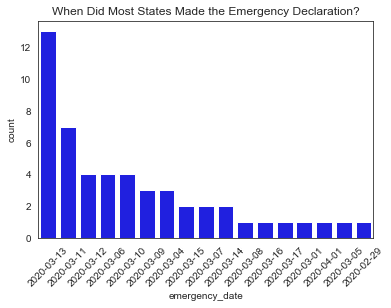

In [82]:
# number of states where emergency state was declared = 100%
# When was emergency state declared?
c = sns.countplot(x=data['emergency_date'],
                  order=data['emergency_date'].value_counts().index,
                  color='blue'
                  );
c.set_title('When Did Most States Made the Emergency Declaration?')
c.set_xticklabels(c.get_xticklabels(), rotation=45);
# source: https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count

In [83]:
data.groupby('emergency_date')['state'].value_counts()

emergency_date  state               
2020-02-29      Washington              1
2020-03-01      Florida                 1
2020-03-04      California              1
                Hawaii                  1
                West Virginia           1
2020-03-05      Maryland                1
2020-03-06      Indiana                 1
                Kentucky                1
                Pennsylvania            1
                Utah                    1
2020-03-07      Kansas                  1
                New York                1
2020-03-08      Oregon                  1
2020-03-09      New Jersey              1
                Ohio                    1
                Rhode Island            1
2020-03-10      Connecticut             1
                Massachusetts           1
                Michigan                1
                North Carolina          1
2020-03-11      Alaska                  1
                Arizona                 1
                Arkansas               

### Emergency Declaration by States and Dates

Federal Emergency Declaration - March 13, 2020

States that declared emergency before the Federal Emergency Declaration

Earliest: State of Washington - Febr. 29, 2020

31 states
States that declared emergency on the same day when Federal Emergency was declared

13 states

States that declared emergency after the Federal Emergency Declaration

7 states

6 states within 4 days after March 13. Last state to hold out was Ilinois. It declared emergency on April 1.

In [84]:
from datetime import date 

In [85]:
pd.DataFrame(data[data['order_date'] < pd.Timestamp(date(2020,3,13))].groupby('order_date')['state'].value_counts())

state
order_date state                      
2020-02-29 Washington                1
2020-03-01 Florida                   1
2020-03-04 California                1
           Hawaii                    1
           West Virginia             1
2020-03-05 Maryland                  1
2020-03-06 Indiana                   1
           Kentucky                  1
           Pennsylvania              1
           Utah                      1
2020-03-07 Kansas                    1
           New York                  1
2020-03-08 Oregon                    1
2020-03-09 New Jersey                1
           Ohio                      1
           Rhode Island              1
2020-03-10 Connecticut               1
           Massachusetts             1
           Michigan                  1
           North Carolina            1
2020-03-11 Alaska                    1
           Arizona                   1
           Arkansas                  1
           Colorado                  1
           District of Columbia      1
           Louisiana                 1
           New Mexico                1
2020-03-12 Montana                   1
           Tennessee                 1
           Virginia                  1
           Wisconsin                 1

In [21]:
before = data[data['order_date'] < pd.Timestamp(date(2020,3,13))]
before.head()

,state,easing_soc_dist,stay_home_ord,traveler_quarant,business_clos,gathering_ban,school_clos,rest_lims,primaries,emergency_date,emergency,order_date
1,Alaska,1,Lifted,All Travelers,All Non-Essential Businesses Permitted to Reopen with Reduced Capacity,Expanded to 50+ People Prohibited,Closed for School Year,Reopened to Dine-in Service with Capacity Limits,Remote,2020-03-11,Yes,2020-03-11
2,Arizona,1,Statewide,From Certain States,Some Non-Essential Businesses Permitted to Reopen with Reduced Capacity,>10 People Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-11,Yes,2020-03-11
3,Arkansas,1,No,No information,Some Non-Essential Businesses Permitted to Reopen with Reduced Capacity,>10 People Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-11,Yes,2020-03-11
4,California,1,Statewide,No information,Some Non-Essential Businesses Permitted to Reopen with Reduced Capacity,All Gatherings Prohibited,Recommended Closure for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-04,Yes,2020-03-04
5,Colorado,1,Rolled Back to High Risk Groups,No information,Some Non-Essential Businesses Permitted to Reopen with Reduced Capacity,Expanded to >10 People Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-11,Yes,2020-03-11


In [97]:
data.groupby('stay_home_ord')['state'].value_counts()

stay_home_ord                    state               
High-Risk Groups                 Oklahoma                1
Lifted                           Alabama                 1
                                 Alaska                  1
                                 Florida                 1
                                 Idaho                   1
                                 Indiana                 1
                                 Kansas                  1
                                 Mississippi             1
                                 Missouri                1
                                 Montana                 1
                                 South Carolina          1
                                 Tennessee               1
                                 Texas                   1
                                 Utah                    1
                                 West Virginia           1
No                               Arkansas                1
  

In [118]:
# states where stay_home_ord = statewide stayhome order in place
print(f"{data.loc[data['stay_home_ord'] == 'Statewide']['state'].count()} states had a statewide stay at home order in place on May 9.")
print("")
statewide = data.loc[data['stay_home_ord'] == 'Statewide']['state']
for i in statewide:
    print(i)

28 states had a statewide stay at home order in place on May 9.

Arizona
California
Connecticut
Delaware
District of Columbia
Hawaii
Illinois
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
Ohio
Oregon
Pennsylvania
Rhode Island
Vermont
Virginia
Washington
Wisconsin


In [117]:
# states where stay_home_ord = Lifted 

print(f"{data.loc[data['stay_home_ord'] == 'Lifted']['state'].count()} states lifted the stay at home order by May 9.")
print("")
data.loc[data['stay_home_ord'] == 'Lifted']['state']


14 states lifted the stay at home order by May 9.



0            Alabama
1             Alaska
9            Florida
12             Idaho
14           Indiana
16            Kansas
24       Mississippi
25          Missouri
26           Montana
40    South Carolina
42         Tennessee
43             Texas
44              Utah
48     West Virginia
Name: state, dtype: object

In [119]:
# states where stay_home_ord = No 

print(f"{data.loc[data['stay_home_ord'] == 'No']['state'].count()} states had NO statewide stay at home order.")
print("")
data.loc[data['stay_home_ord'] == 'No']['state']


6 states had NO statewide stay at home order.



3         Arkansas
15            Iowa
27        Nebraska
34    North Dakota
41    South Dakota
50         Wyoming
Name: state, dtype: object

In [121]:
# states where stay_home_ord = Rolled back to high risk groups 

print(f"As of May 9, {data.loc[data['stay_home_ord'] == 'Rolled Back to High Risk Groups']['state'].count()} \
states rolled back their stay at home orders to high risk groups.")
print("")
data.loc[data['stay_home_ord'] == 'Rolled Back to High Risk Groups']['state']


As of May 9, 2 states rolled back their stay at home orders to high risk groups.



5     Colorado
10     Georgia
Name: state, dtype: object

In [122]:
# states where stay_home_ord = High-Risk Groups 

print(f"{data.loc[data['stay_home_ord'] == 'High-Risk Groups']['state'].count()} \
state had a stay at home order in place only for high risk groups.")
print("")
data.loc[data['stay_home_ord'] == 'High-Risk Groups']['state']

1 state had a stay at home order in place only for high risk groups.



36    Oklahoma
Name: state, dtype: object

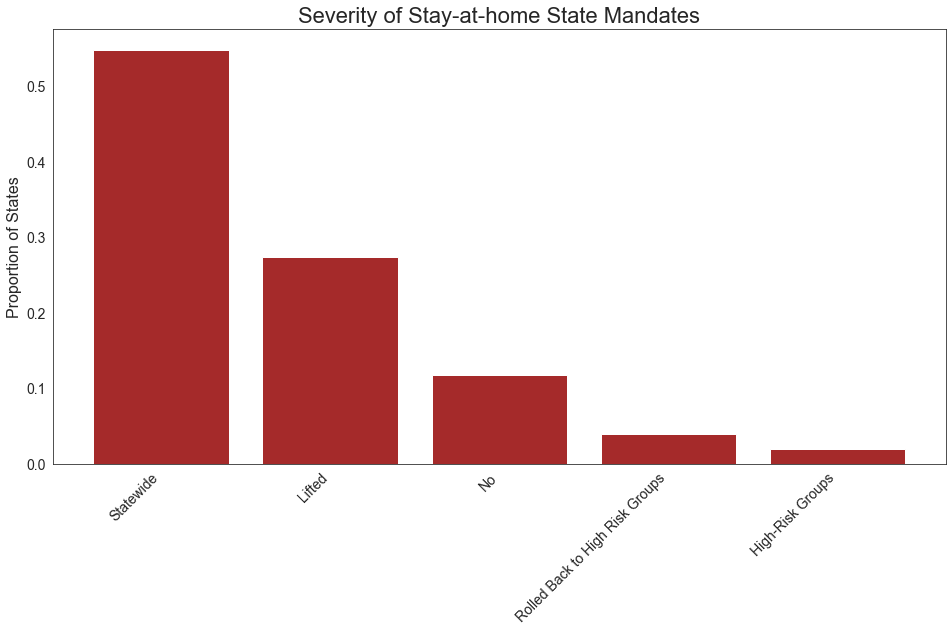

In [159]:
# create a plot of the severity of stay-at-home state mandates

plt.figure(figsize=(16, 8))
plt.title('Severity of Stay-at-home State Mandates', fontsize=22)
plt.ylabel('Proportion of States', size=16)
plt.xticks(size=14, rotation=45, ha='right')
plt.yticks(size=14)
plt.bar(data['stay_home_ord'].value_counts().index, 
        data['stay_home_ord'].value_counts(normalize=True), color='brown');

In [123]:
# states that had stay at home/ shelter in place mandates
# states that did not

data['shelter_in_place'] = data['stay_home_ord'].map({'Statewide': 1, 
                                                      'Lifted': 1, 
                                                      'No': 0, 
                                                      'Rolled Back to High Risk Groups': 1,
                                                      'High Risk Groups': 1})

In [124]:
# print the percentage of states that did not have a mandated shelter in place

data['shelter_in_place'].value_counts(normalize=True)


1.0    0.88
0.0    0.12
Name: shelter_in_place, dtype: float64

In [125]:
data.head(1)

,state,easing_soc_dist,stay_home_ord,traveler_quarant,business_clos,gathering_ban,school_clos,rest_lims,primaries,emergency_date,emergency,order_date,shelter_in_place
0,Alabama,1,Lifted,No information,Some Non-Essential Businesses Permitted to Reopen with Reduced Capacity,>10 People Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-13,Yes,2020-03-13,1.0


In [15]:
# inspect states where primaries were postponed 
# compare to NY Times source
data.loc[data['primaries'] == 'Postponed']['state']

6              Connecticut
7                 Delaware
8     District of Columbia
10                 Georgia
14                 Indiana
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
24             Mississippi
26                 Montana
30              New Jersey
31              New Mexico
38            Pennsylvania
39            Rhode Island
41            South Dakota
48           West Virginia
Name: state, dtype: object

In [126]:
# add column with state abbreviations

data['state_abbr'] = data['state'].map({
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
})

# source: https://gist.github.com/rogerallen/1583593

In [128]:
# data.to_csv('../data/cleaned_state_mandates.csv', index=False)

In [129]:
data.head()

,state,easing_soc_dist,stay_home_ord,traveler_quarant,business_clos,gathering_ban,school_clos,rest_lims,primaries,emergency_date,emergency,order_date,shelter_in_place,state_abbr
0,Alabama,1,Lifted,No information,Some Non-Essential Businesses Permitted to Reopen with Reduced Capacity,>10 People Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-13,Yes,2020-03-13,1.0,AL
1,Alaska,1,Lifted,All Travelers,All Non-Essential Businesses Permitted to Reopen with Reduced Capacity,Expanded to 50+ People Prohibited,Closed for School Year,Reopened to Dine-in Service with Capacity Limits,Remote,2020-03-11,Yes,2020-03-11,1.0,AK
2,Arizona,1,Statewide,From Certain States,Some Non-Essential Businesses Permitted to Reopen with Reduced Capacity,>10 People Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-11,Yes,2020-03-11,1.0,AZ
3,Arkansas,1,No,No information,Some Non-Essential Businesses Permitted to Reopen with Reduced Capacity,>10 People Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-11,Yes,2020-03-11,0.0,AR
4,California,1,Statewide,No information,Some Non-Essential Businesses Permitted to Reopen with Reduced Capacity,All Gatherings Prohibited,Recommended Closure for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-04,Yes,2020-03-04,1.0,CA


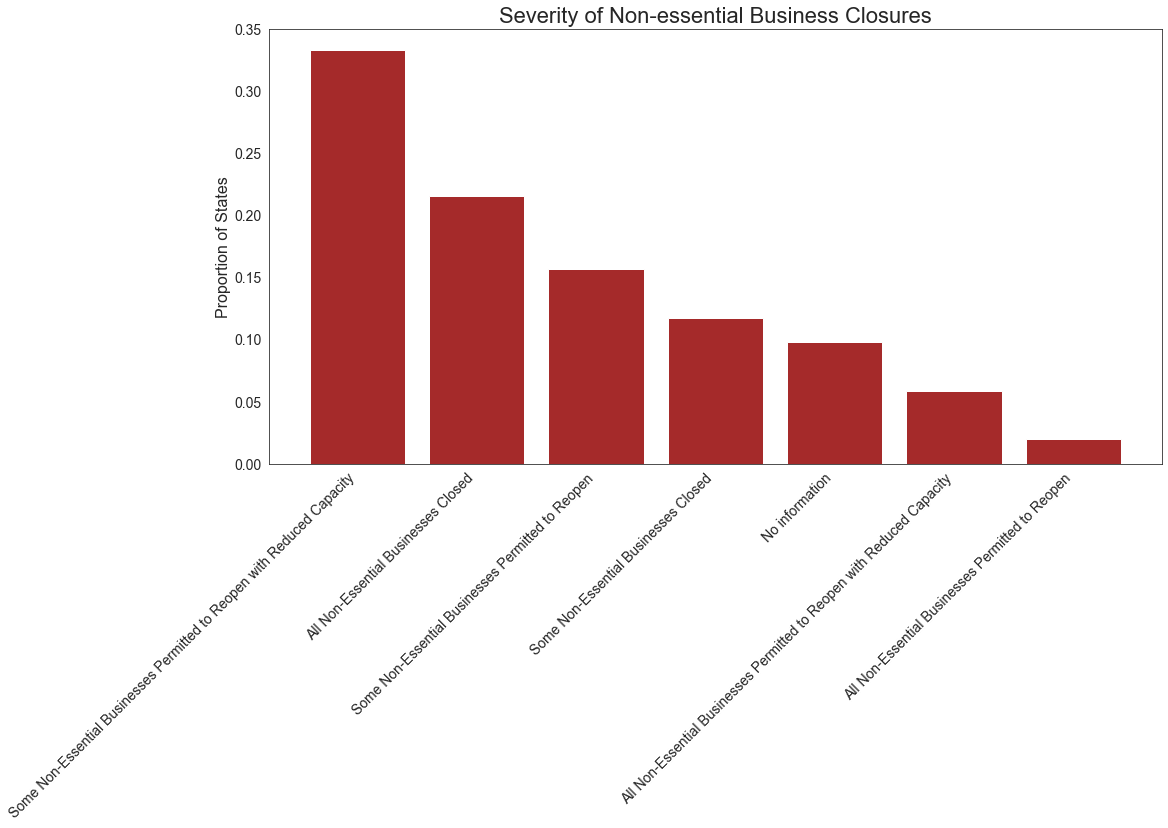

In [156]:
# create a plot of non-essential business closures

plt.figure(figsize=(16, 8))
plt.title('Severity of Non-essential Business Closures', fontsize=22)
plt.ylabel('Proportion of States', size=16)
plt.xticks(size=14, rotation=45, ha='right')
plt.yticks(size=14)
plt.bar(data['business_clos'].value_counts().index, 
        data['business_clos'].value_counts(normalize=True), color='brown');

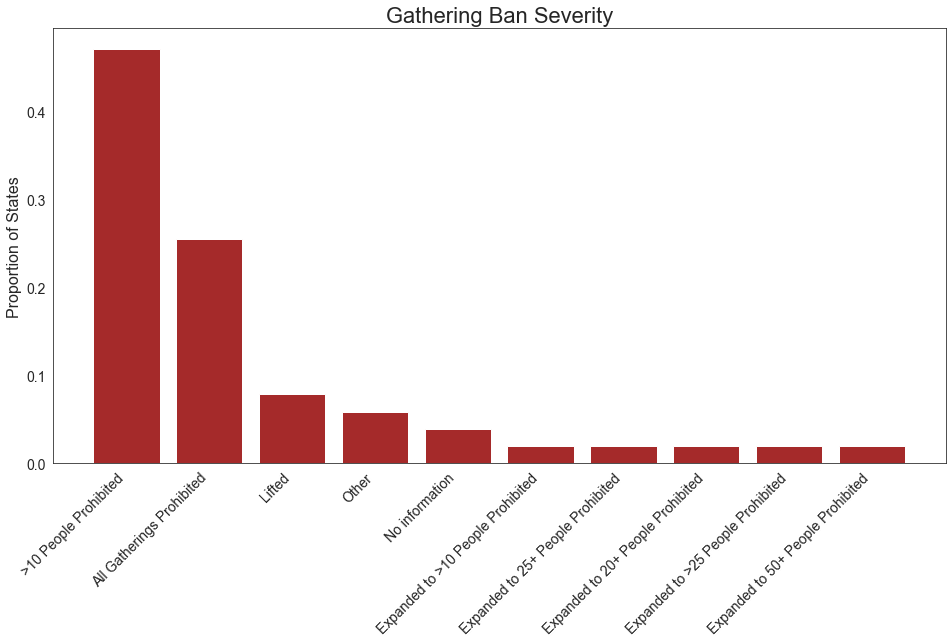

In [155]:
# create a plot of states by the severity of gathering bans

plt.figure(figsize=(16, 8))
plt.title('Gathering Ban Severity', fontsize=22)
plt.ylabel('Proportion of States', size=16)
plt.xticks(size=14, rotation=45, ha='right')
plt.yticks(size=14)
plt.bar(data['gathering_ban'].value_counts().index, 
        data['gathering_ban'].value_counts(normalize=True), color='brown');

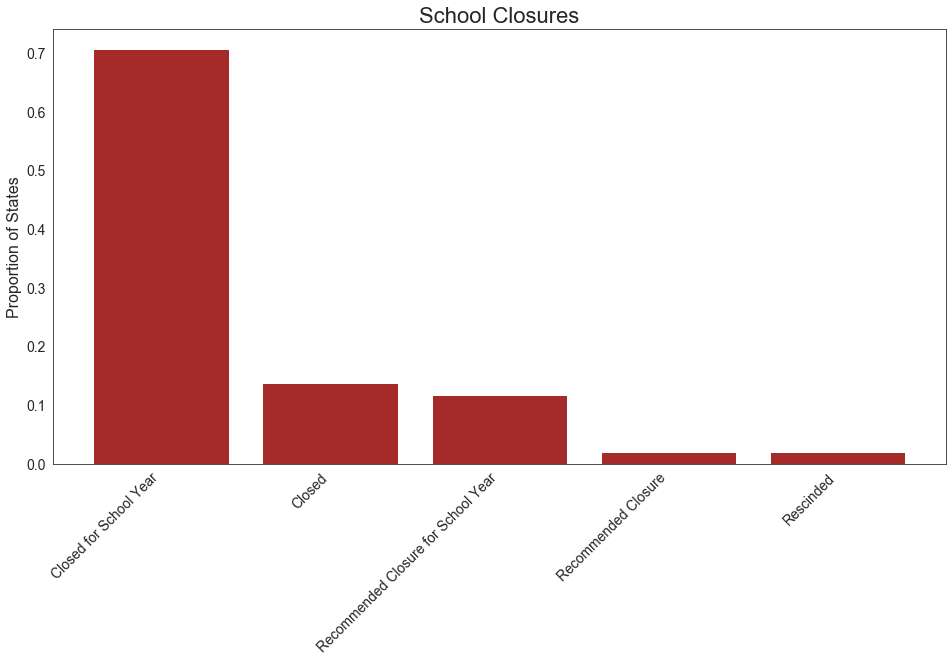

In [160]:
# create a plot of states by school closures

plt.figure(figsize=(16, 8))
plt.title('School Closures', fontsize=22)
plt.ylabel('Proportion of States', size=16)
plt.xticks(size=14, rotation=45, ha='right')
plt.yticks(size=14)
plt.bar(data['school_clos'].value_counts().index, 
        data['school_clos'].value_counts(normalize=True), color='brown');

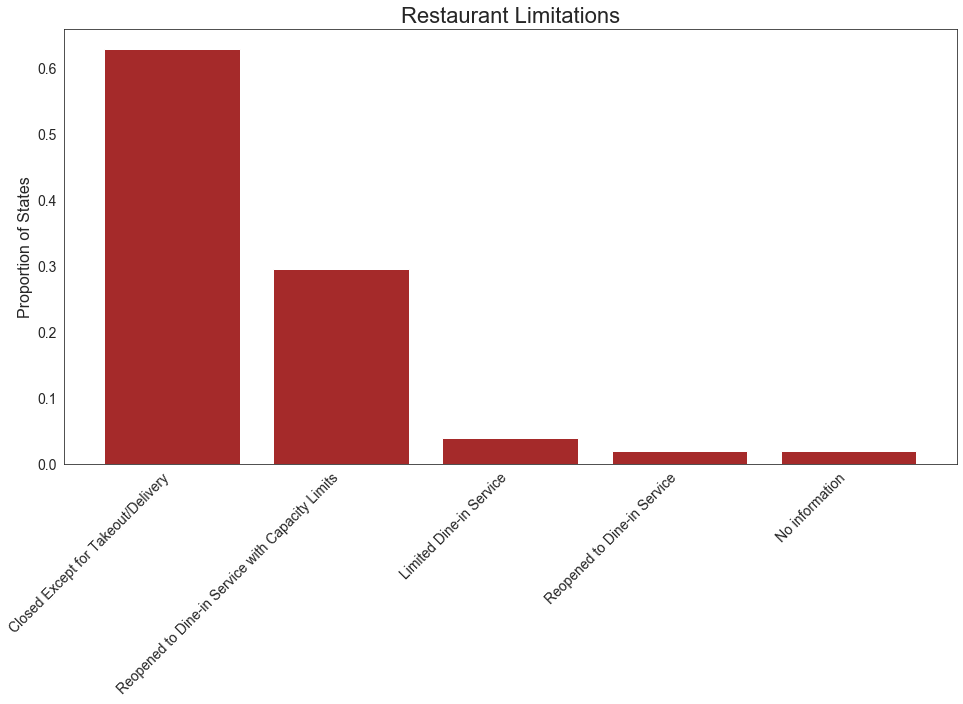

In [161]:
# create a plot of states by restaurant limitations

plt.figure(figsize=(16, 8))
plt.title('Restaurant Limitations', fontsize=22)
plt.ylabel('Proportion of States', size=16)
plt.xticks(size=14, rotation=45, ha='right')
plt.yticks(size=14)
plt.bar(data['rest_lims'].value_counts().index, 
        data['rest_lims'].value_counts(normalize=True), color='brown');

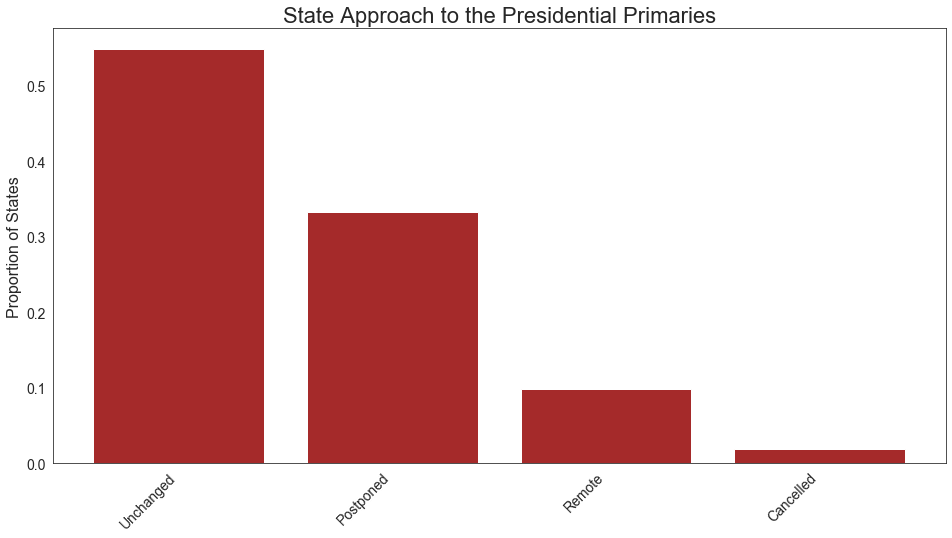

In [162]:
# create a plot of states by decision on postponing the presidential primaries

plt.figure(figsize=(16, 8))
plt.title('State Approach to the Presidential Primaries', fontsize=22)
plt.ylabel('Proportion of States', size=16)
plt.xticks(size=14, rotation=45, ha='right')
plt.yticks(size=14)
plt.bar(data['primaries'].value_counts().index, 
        data['primaries'].value_counts(normalize=True), color='brown');

---
I am interested to see which states had the most lenient approach to the social distancing recommendations during the COVID19 pandemic.

In [166]:
data['rest_lims'].value_counts()

Closed Except for Takeout/Delivery                  32
Reopened to Dine-in Service with Capacity Limits    15
Limited Dine-in Service                              2
Reopened to Dine-in Service                          1
No information                                       1
Name: rest_lims, dtype: int64

In [171]:
# create a condition of leniency
condition = (data['stay_home_ord'] == 'No') | (data['business_clos'] == 'Some Non-Essential Businesses Closed')|\
          (data['gathering_ban'] == 'Expanded to 50+ People Prohibited') | (data['school_clos'] == 'Rescinded')|\
          (data['school_clos'] == 'Recommended Closure')|\
          (data['school_clos'] == 'Recommended Closure for School Year')|\
          (data['rest_lims'] == 'Reopened to Dine-in Service')|\
          (data['rest_lims'] == 'Limited Dine-in Service')

In [190]:
# dataframe of most lenient states
lenient = data.loc[condition]

In [191]:
lenient.shape
# 22 states fall into this category

(22, 14)

In [198]:
lenient.loc[lenient['stay_home_ord'] == 'No']

,state,easing_soc_dist,stay_home_ord,traveler_quarant,business_clos,gathering_ban,school_clos,rest_lims,primaries,emergency_date,emergency,order_date,shelter_in_place,state_abbr
3,Arkansas,1,No,No information,Some Non-Essential Businesses Permitted to Reopen with Reduced Capacity,>10 People Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-11,Yes,2020-03-11,0.0,AR
15,Iowa,1,No,No information,All Non-Essential Businesses Permitted to Reopen,>10 People Prohibited,Closed for School Year,Reopened to Dine-in Service with Capacity Limits,Unchanged,2020-03-17,Yes,2020-03-17,0.0,IA
27,Nebraska,1,No,No information,No information,>10 People Prohibited,Closed,Reopened to Dine-in Service with Capacity Limits,Unchanged,2020-03-13,Yes,2020-03-13,0.0,NE
34,North Dakota,1,No,All Travelers,All Non-Essential Businesses Permitted to Reopen with Reduced Capacity,No information,Closed,Reopened to Dine-in Service with Capacity Limits,Unchanged,2020-03-13,Yes,2020-03-13,0.0,ND
41,South Dakota,1,No,No information,No information,Lifted,Recommended Closure for School Year,No information,Postponed,2020-03-13,Yes,2020-03-13,0.0,SD
50,Wyoming,0,No,All Travelers,No information,>10 People Prohibited,Closed,Closed Except for Takeout/Delivery,Remote,2020-03-13,Yes,2020-03-13,0.0,WY
